In [ ]:
##  What i trying to do 
### Try to create a auto trade system of stock market base on the dayily trading report from WWW.ARKINVEST.COM
### The whole concept is create an system downloaning arkinvest trading reporting and analyze the daily buy-sell activity. 
### connecect the analyze result and apply to my stock trading account,place order by aanalysis result. there are two trading model 1. trade base on the result of 
### last day analyze result.  2. apply machine learning to the analyze, create prediction model base on the buy-sell trend and execute the buy-sell order base on the prediction result.



In [1]:
## loop through all the csv documents on Jun/4/2021

import pandas as pd
import glob
path = r'/Users/balance/Desktop/ARK_6_4_21' # use your path
all_files = glob.glob(path + "/*.csv")
li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)
df1 = pd.concat(li, axis=0, ignore_index=True)

import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
import glob
import seaborn as sns
import math
sns.set_theme(color_codes=True)

%matplotlib inline

In [6]:
df1.shape

(432, 8)

In [7]:
## loop through all the csv documents on may/5/2021

path2 = r'/Users/balance/Desktop/ARK_5_5_21' # use your path
all_files2 = glob.glob(path2 + "/*.csv")
li2 = []
for filename2 in all_files2:
    df2 = pd.read_csv(filename2, index_col=None, header=0)
    li2.append(df2)
df2 = pd.concat(li2, axis=0, ignore_index=True)

In [8]:
df2.shape

(443, 8)

In [9]:
## append the two dataset 
combined=df1.append([df2])

In [10]:
combined.shape

(875, 8)

<AxesSubplot:xlabel='ticker', ylabel='shares'>

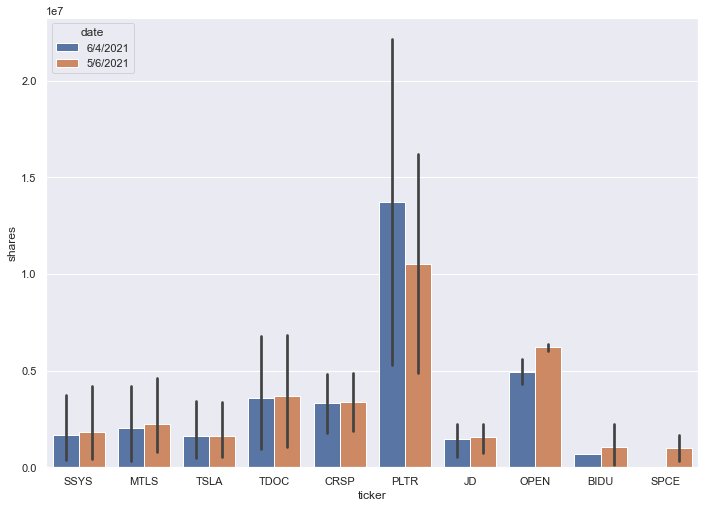

In [11]:
plt.figure(figsize=(11.69, 8.27))
sb.barplot(x="ticker",y="shares", hue='date',data=combined.loc[combined['ticker'].isin(['MTLS','JD','BIDU','OPEN','TDOC','SSYS','CRSP','PLTR','TSLA','SPCE'])])

In [12]:
### merge data1 and data2 vertically. calculating the different between two date. 

df4=pd.merge(df1,df2,on=['fund','ticker'])

In [13]:

## the are 973 row after data merged. check the data status.
df4.shape

(973, 14)

In [14]:
df4.date_x.describe()

count          589
unique           2
top       6/4/2021
freq           397
Name: date_x, dtype: object

In [15]:
df4.date_y.describe()

count          589
unique           2
top       5/6/2021
freq           397
Name: date_y, dtype: object

In [57]:

df4.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401 entries, 0 to 972
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date_x             399 non-null    object 
 1   fund               397 non-null    object 
 2   company_x          397 non-null    object 
 3   ticker             382 non-null    object 
 4   cusip_x            397 non-null    object 
 5   shares_x           397 non-null    float64
 6   market value($)_x  397 non-null    float64
 7   weight(%)_x        397 non-null    float64
 8   date_y             399 non-null    object 
 9   company_y          397 non-null    object 
 10  cusip_y            397 non-null    object 
 11  shares_y           397 non-null    float64
 12  market value($)_y  397 non-null    float64
 13  weight(%)_y        397 non-null    float64
dtypes: float64(6), object(8)
memory usage: 47.0+ KB


In [17]:
df1.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             416 non-null    object 
 1   fund             408 non-null    object 
 2   company          408 non-null    object 
 3   ticker           395 non-null    object 
 4   cusip            408 non-null    object 
 5   shares           408 non-null    float64
 6   market value($)  408 non-null    float64
 7   weight(%)        408 non-null    float64
dtypes: float64(3), object(5)
memory usage: 27.1+ KB


In [18]:
for col in df4.columns:
    pct_missing = np.mean(df4[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

date_x - 39%
fund - 59%
company_x - 59%
ticker - 61%
cusip_x - 59%
shares_x - 59%
market value($)_x - 59%
weight(%)_x - 59%
date_y - 39%
company_y - 59%
cusip_y - 59%
shares_y - 59%
market value($)_y - 59%
weight(%)_y - 59%


In [19]:
for col in df1.columns:
    pct_missing = np.mean(df1[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

date - 4%
fund - 6%
company - 6%
ticker - 9%
cusip - 6%
shares - 6%
market value($) - 6%
weight(%) - 6%


In [22]:
df5=df4.drop_duplicates()

In [23]:
df5.shape

(401, 14)

In [24]:
## when remove the duplicate row, the null precentage drop dramatally.

for col in df5.columns:
    pct_missing = np.mean(df5[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

date_x - 0%
fund - 1%
company_x - 1%
ticker - 5%
cusip_x - 1%
shares_x - 1%
market value($)_x - 1%
weight(%)_x - 1%
date_y - 0%
company_y - 1%
cusip_y - 1%
shares_y - 1%
market value($)_y - 1%
weight(%)_y - 1%


In [25]:
df6=df5.drop(columns=['cusip_x','cusip_y'])

In [27]:
### calculate the shares change 
df6['trend']=(df6.shares_x-df6.shares_y)

In [28]:
df6.head()

,date_x,fund,company_x,ticker,shares_x,market value($)_x,weight(%)_x,date_y,company_y,shares_y,market value($)_y,weight(%)_y,trend
0,6/4/2021,PRNT,3D SYSTEMS CORP,DDD,1245906.0,37676197.44,6.92,5/6/2021,3D SYSTEMS CORP,1320738.0,25133644.14,4.45,-74832.0
1,6/4/2021,PRNT,EXONE CO/THE,XONE,1404628.0,30747306.92,5.64,5/6/2021,EXONE CO/THE,1488995.0,31566694.00,5.59,-84367.0
2,6/4/2021,PRNT,STRAUMANN HOLDING AG-REG,STMN,19414.0,30232980.63,5.55,5/6/2021,STRAUMANN HOLDING AG-REG,20570.0,30466982.42,5.40,-1156.0
3,6/4/2021,PRNT,DESKTOP METAL INC-A,DM,1894776.0,27644781.84,5.08,5/6/2021,DESKTOP METAL INC-A,1094181.0,13392775.44,2.37,800595.0
4,6/4/2021,PRNT,SLM SOLUTIONS GROUP AG,AM3D,1196444.0,27197186.51,4.99,5/6/2021,SLM SOLUTIONS GROUP AG,1268303.0,28806382.51,5.10,-71859.0


In [29]:
### sort the 'trend'  
df7 = df6.sort_values(['trend'], ascending=[False])

In [30]:
df7

,date_x,fund,company_x,ticker,shares_x,market value($)_x,weight(%)_x,date_y,company_y,shares_y,market value($)_y,weight(%)_y,trend
935,6/4/2021,ARKF,JAPANESE YEN,NaN,66936821.00,6.069991e+05,0.02,5/6/2021,DREYFUS GOVT CASH MAN INS,7338413.33,7.338413e+06,0.19,59598407.67
741,6/4/2021,ARKK,DREYFUS GOVT CASH MAN INS,NaN,64693199.72,6.469320e+07,0.32,5/6/2021,DREYFUS GOVT CASH MAN INS,39836485.42,3.983649e+07,0.19,24856714.30
843,6/4/2021,ARKG,DREYFUS GOVT CASH MAN INS,NaN,12308946.64,1.230895e+07,0.15,5/6/2021,CM LIFE SCIENCES II INC,456329.00,6.238017e+06,0.07,11852617.64
705,6/4/2021,ARKK,PALANTIR TECHNOLOGIES INC-A,PLTR,22142340.00,5.232235e+08,2.59,5/6/2021,PALANTIR TECHNOLOGIES INC-A,16177341.00,3.421508e+08,1.63,5964999.00
891,6/4/2021,ARKQ,DREYFUS GOVT CASH MAN INS,NaN,8696326.21,8.696326e+06,0.30,5/6/2021,DREYFUS GOVT CASH MAN INS,3789567.83,3.789568e+06,0.12,4906758.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...
844,6/4/2021,ARKG,CM LIFE SCIENCES II INC,NaN,787766.00,1.039851e+07,0.13,5/6/2021,DREYFUS GOVT CASH MAN INS,16909103.84,1.690910e+07,0.19,-16121337.84
57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,The principal risks of investing in ARK ETFs i...,NaN,NaN,NaN,NaN,NaN
105,The principal risks of investing in ARK ETFs i...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
df7.shape

(401, 13)

In [42]:
df7.head(20)

,date_x,fund,company_x,ticker,shares_x,market value($)_x,weight(%)_x,date_y,company_y,shares_y,market value($)_y,weight(%)_y,trend
935,6/4/2021,ARKF,JAPANESE YEN,NaN,66936821.00,6.069991e+05,0.02,5/6/2021,DREYFUS GOVT CASH MAN INS,7338413.33,7.338413e+06,0.19,59598407.67
741,6/4/2021,ARKK,DREYFUS GOVT CASH MAN INS,NaN,64693199.72,6.469320e+07,0.32,5/6/2021,DREYFUS GOVT CASH MAN INS,39836485.42,3.983649e+07,0.19,24856714.30
843,6/4/2021,ARKG,DREYFUS GOVT CASH MAN INS,NaN,12308946.64,1.230895e+07,0.15,5/6/2021,CM LIFE SCIENCES II INC,456329.00,6.238017e+06,0.07,11852617.64
705,6/4/2021,ARKK,PALANTIR TECHNOLOGIES INC-A,PLTR,22142340.00,5.232235e+08,2.59,5/6/2021,PALANTIR TECHNOLOGIES INC-A,16177341.00,3.421508e+08,1.63,5964999.00
891,6/4/2021,ARKQ,DREYFUS GOVT CASH MAN INS,NaN,8696326.21,8.696326e+06,0.30,5/6/2021,DREYFUS GOVT CASH MAN INS,3789567.83,3.789568e+06,0.12,4906758.38
714,6/4/2021,ARKK,SKILLZ INC,SKLZ,15180627.00,3.222847e+08,1.60,5/6/2021,SKILLZ INC,10475984.00,1.621682e+08,0.77,4704643.00
910,6/4/2021,ARKF,Z HOLDINGS CORP,4689,18332626.00,8.528349e+07,2.38,5/6/2021,Z HOLDINGS CORP,14306630.00,6.616767e+07,1.69,4025996.00
708,6/4/2021,ARKK,DRAFTKINGS INC - CL A,DKNG,7933402.00,3.943694e+08,1.96,5/6/2021,DRAFTKINGS INC - CL A,4971879.00,2.793202e+08,1.33,2961523.00
779,6/4/2021,ARKW,NANO DIMENSION LTD - ADR,NNDM,7461444.00,5.424470e+07,1.01,5/6/2021,NANO DIMENSION LTD - ADR,5269151.00,3.619907e+07,0.60,2192293.00
820,6/4/2021,ARKG,SIGNIFY HEALTH INC -CLASS A,SGFY,3857801.00,9.451612e+07,1.17,5/6/2021,SIGNIFY HEALTH INC -CLASS A,2044628.00,5.285363e+07,0.60,1813173.00


<AxesSubplot:xlabel='ticker', ylabel='shares'>

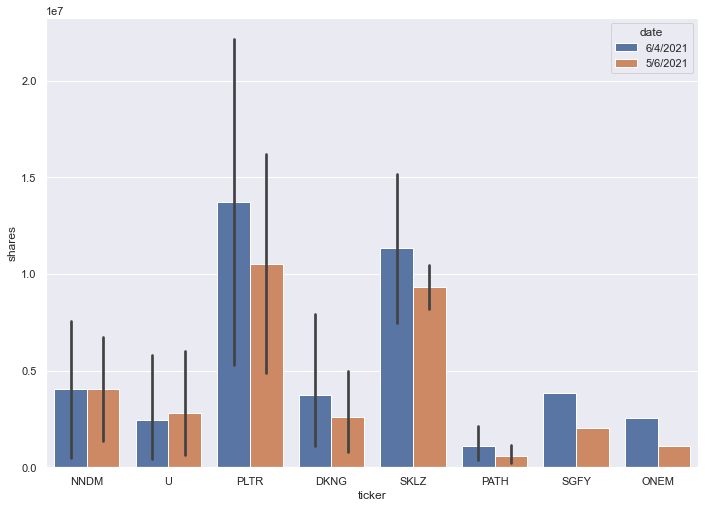

In [55]:
plt.figure(figsize=(11.69, 8.27))
sb.barplot(x="ticker",y="shares", hue='date',data=combined.loc[combined['ticker'].isin(['PLTR','SKLZ','DKNG','NNDM','SGFY','PATH','U','ONEM'])])

In [52]:
df7.tail(20)

,date_x,fund,company_x,ticker,shares_x,market value($)_x,weight(%)_x,date_y,company_y,shares_y,market value($)_y,weight(%)_y,trend
36,6/4/2021,PRNT,NANO DIMENSION LTD - ADR,NNDM,201123.00,1.462164e+06,0.27,5/6/2021,NANO DIMENSION LTD - ADR,1934283.00,1.328852e+07,2.35,-1733160.00
54,6/4/2021,PRNT,DREYFUS GOVT CASH MAN INS,NaN,442077.02,4.420770e+05,0.08,5/6/2021,DREYFUS GOVT CASH MAN INS,2293500.44,2.293500e+06,0.41,-1851423.42
772,6/4/2021,ARKW,OPENDOOR TECHNOLOGIES INC,OPEN,4290295.00,6.993181e+07,1.31,5/6/2021,OPENDOOR TECHNOLOGIES INC,6395318.00,1.209994e+08,1.99,-2105023.00
804,6/4/2021,ARKG,ROCHE HOLDINGS LTD-SPONS ADR,RHHBY,4800982.00,2.098029e+08,2.61,5/6/2021,ROCHE HOLDINGS LTD-SPONS ADR,6942846.00,2.837541e+08,3.24,-2141864.00
797,6/4/2021,ARKG,TAKEDA PHARMACEUTIC-SP ADR,TAK UN,15944541.00,2.648388e+08,3.29,5/6/2021,TAKEDA PHARMACEUTIC-SP ADR,18231465.00,3.026423e+08,3.46,-2286924.00
55,6/4/2021,PRNT,EURO,NaN,1031.01,1.250620e+03,0.00,5/6/2021,DREYFUS GOVT CASH MAN INS,2293500.44,2.293500e+06,0.41,-2292469.43
56,6/4/2021,PRNT,GREAT BRITISH POUND,NaN,0.24,3.400000e-01,0.00,5/6/2021,DREYFUS GOVT CASH MAN INS,2293500.44,2.293500e+06,0.41,-2293500.20
732,6/4/2021,ARKK,KE HOLDINGS INC-ADR,BEKE,2597714.00,1.201443e+08,0.60,5/6/2021,KE HOLDINGS INC-ADR,6160873.00,3.050248e+08,1.45,-3563159.00
744,6/4/2021,ARKK,SYROS PHARMACEUTICALS INC,SYRS,15959.00,9.559441e+04,0.00,5/6/2021,SYROS PHARMACEUTICALS INC,4049421.00,2.219083e+07,0.11,-4033462.00
743,6/4/2021,ARKK,HUYA INC-ADR,HUYA,1151516.00,1.729577e+07,0.09,5/6/2021,HUYA INC-ADR,5509534.00,9.013598e+07,0.43,-4358018.00


In [59]:
df7['trend%']=((df6.shares_x-df6.shares_y)/(df6.shares_x+df6.shares_y))

In [62]:
df7.head(20)

,date_x,fund,company_x,ticker,shares_x,market value($)_x,weight(%)_x,date_y,company_y,shares_y,market value($)_y,weight(%)_y,trend,trend%
935,6/4/2021,ARKF,JAPANESE YEN,NaN,66936821.00,6.069991e+05,0.02,5/6/2021,DREYFUS GOVT CASH MAN INS,7338413.33,7.338413e+06,0.19,59598407.67,0.802399
741,6/4/2021,ARKK,DREYFUS GOVT CASH MAN INS,NaN,64693199.72,6.469320e+07,0.32,5/6/2021,DREYFUS GOVT CASH MAN INS,39836485.42,3.983649e+07,0.19,24856714.30,0.237796
843,6/4/2021,ARKG,DREYFUS GOVT CASH MAN INS,NaN,12308946.64,1.230895e+07,0.15,5/6/2021,CM LIFE SCIENCES II INC,456329.00,6.238017e+06,0.07,11852617.64,0.928505
705,6/4/2021,ARKK,PALANTIR TECHNOLOGIES INC-A,PLTR,22142340.00,5.232235e+08,2.59,5/6/2021,PALANTIR TECHNOLOGIES INC-A,16177341.00,3.421508e+08,1.63,5964999.00,0.155664
891,6/4/2021,ARKQ,DREYFUS GOVT CASH MAN INS,NaN,8696326.21,8.696326e+06,0.30,5/6/2021,DREYFUS GOVT CASH MAN INS,3789567.83,3.789568e+06,0.12,4906758.38,0.392984
714,6/4/2021,ARKK,SKILLZ INC,SKLZ,15180627.00,3.222847e+08,1.60,5/6/2021,SKILLZ INC,10475984.00,1.621682e+08,0.77,4704643.00,0.183370
910,6/4/2021,ARKF,Z HOLDINGS CORP,4689,18332626.00,8.528349e+07,2.38,5/6/2021,Z HOLDINGS CORP,14306630.00,6.616767e+07,1.69,4025996.00,0.123348
708,6/4/2021,ARKK,DRAFTKINGS INC - CL A,DKNG,7933402.00,3.943694e+08,1.96,5/6/2021,DRAFTKINGS INC - CL A,4971879.00,2.793202e+08,1.33,2961523.00,0.229481
779,6/4/2021,ARKW,NANO DIMENSION LTD - ADR,NNDM,7461444.00,5.424470e+07,1.01,5/6/2021,NANO DIMENSION LTD - ADR,5269151.00,3.619907e+07,0.60,2192293.00,0.172207
820,6/4/2021,ARKG,SIGNIFY HEALTH INC -CLASS A,SGFY,3857801.00,9.451612e+07,1.17,5/6/2021,SIGNIFY HEALTH INC -CLASS A,2044628.00,5.285363e+07,0.60,1813173.00,0.307191


In [63]:
df8 = df7.sort_values(['trend%'], ascending=[False])

In [66]:
df8.tail(10)

,date_x,fund,company_x,ticker,shares_x,market value($)_x,weight(%)_x,date_y,company_y,shares_y,market value($)_y,weight(%)_y,trend,trend%
788,6/4/2021,ARKW,INTERCONTINENTAL EXCHANGE IN,ICE,9331.00,1041339.60,0.02,5/6/2021,INTERCONTINENTAL EXCHANGE IN,592393.00,67959324.96,1.12,-583062.00,-0.968986
848,6/4/2021,ARKG,SYROS PHARMACEUTICALS INC,SYRS,6417.00,38437.83,0.00,5/6/2021,SYROS PHARMACEUTICALS INC,1440828.00,7895737.44,0.09,-1434411.00,-0.991132
744,6/4/2021,ARKK,SYROS PHARMACEUTICALS INC,SYRS,15959.00,95594.41,0.00,5/6/2021,SYROS PHARMACEUTICALS INC,4049421.00,22190827.08,0.11,-4033462.00,-0.992149
55,6/4/2021,PRNT,EURO,NaN,1031.01,1250.62,0.00,5/6/2021,DREYFUS GOVT CASH MAN INS,2293500.44,2293500.44,0.41,-2292469.43,-0.999101
936,6/4/2021,ARKF,SOUTH AFRICAN RAND,NaN,136.75,10.02,0.00,5/6/2021,DREYFUS GOVT CASH MAN INS,7338413.33,7338413.33,0.19,-7338276.58,-0.999963
56,6/4/2021,PRNT,GREAT BRITISH POUND,NaN,0.24,0.34,0.00,5/6/2021,DREYFUS GOVT CASH MAN INS,2293500.44,2293500.44,0.41,-2293500.20,-1.000000
57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,The principal risks of investing in ARK ETFs i...,NaN,NaN,NaN,NaN,NaN,NaN
105,The principal risks of investing in ARK ETFs i...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107,The principal risks of investing in ARK ETFs i...,NaN,NaN,NaN,NaN,NaN,NaN,The principal risks of investing in ARK ETFs i...,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
df8.head(10)

,date_x,fund,company_x,ticker,shares_x,market value($)_x,weight(%)_x,date_y,company_y,shares_y,market value($)_y,weight(%)_y,trend,trend%
843,6/4/2021,ARKG,DREYFUS GOVT CASH MAN INS,NaN,12308946.64,1.230895e+07,0.15,5/6/2021,CM LIFE SCIENCES II INC,456329.00,6238017.43,0.07,11852617.64,0.928505
633,6/4/2021,IZRL,ONE SOFTWARE TECHNOLOGIES LT,ONE,437860.00,5.678129e+07,15.63,5/6/2021,ONE SOFTWARE TECHNOLOGIES LT,46165.00,5910341.66,1.79,391695.00,0.809245
935,6/4/2021,ARKF,JAPANESE YEN,NaN,66936821.00,6.069991e+05,0.02,5/6/2021,DREYFUS GOVT CASH MAN INS,7338413.33,7338413.33,0.19,59598407.67,0.802399
770,6/4/2021,ARKW,OKTA INC,OKTA,352579.00,7.429545e+07,1.39,5/6/2021,OKTA INC,105426.00,25519417.56,0.42,247153.00,0.539629
904,6/4/2021,ARKF,COINBASE GLOBAL INC -CLASS A,COIN,462885.00,1.081577e+08,3.01,5/6/2021,COINBASE GLOBAL INC -CLASS A,169867.00,46373691.00,1.19,293018.00,0.463085
869,6/4/2021,ARKQ,UIPATH INC - CLASS A,PATH,639105.00,4.698700e+07,1.62,5/6/2021,UIPATH INC - CLASS A,263638.00,18684025.06,0.61,375467.00,0.415918
821,6/4/2021,ARKG,1LIFE HEALTHCARE INC,ONEM,2539247.00,9.220006e+07,1.15,5/6/2021,1LIFE HEALTHCARE INC,1089835.00,44944795.40,0.51,1449412.00,0.399388
891,6/4/2021,ARKQ,DREYFUS GOVT CASH MAN INS,NaN,8696326.21,8.696326e+06,0.30,5/6/2021,DREYFUS GOVT CASH MAN INS,3789567.83,3789567.83,0.12,4906758.38,0.392984
967,6/4/2021,ARKX,UIPATH INC - CLASS A,PATH,84858.00,6.238760e+06,1.00,5/6/2021,UIPATH INC - CLASS A,41229.00,2921899.23,0.45,43629.00,0.346023
836,6/4/2021,ARKG,ZYMERGEN INC,ZY,1054560.00,3.632959e+07,0.45,5/6/2021,ZYMERGEN INC,532810.00,25042070.00,0.29,521750.00,0.328688


<AxesSubplot:xlabel='ticker', ylabel='shares'>

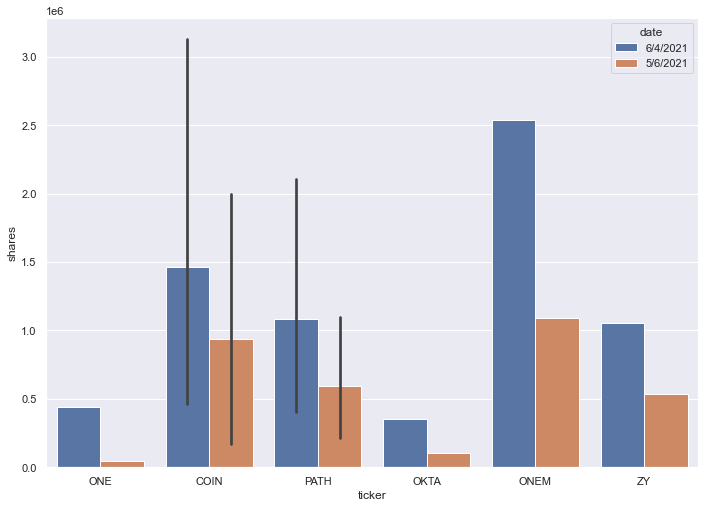

In [74]:
plt.figure(figsize=(11.69, 8.27))
sb.barplot(x="ticker",y="shares", hue='date',data=combined.loc[combined['ticker'].isin(['ONE','OKTA','COIN','PATH','ONEM','ZY'])])

<AxesSubplot:xlabel='ticker', ylabel='shares'>

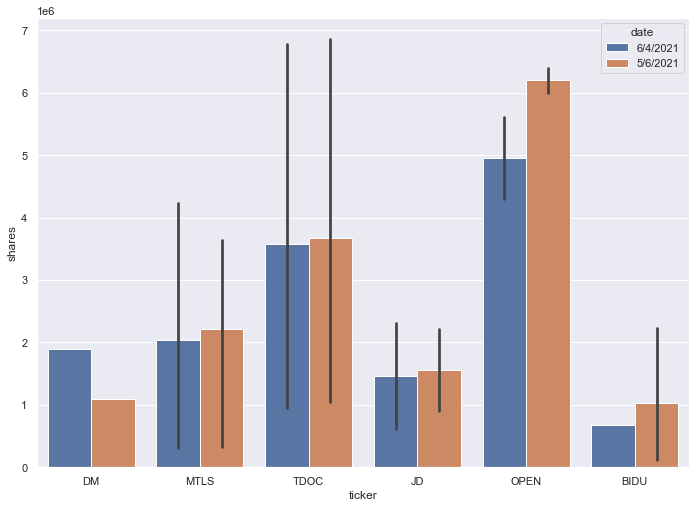

In [76]:
plt.figure(figsize=(11.69, 8.27))
sb.barplot(x="ticker",y="shares", hue='date',data=combined.loc[combined['ticker'].isin(['MTLS','BIDU','JD','TDOC','OPEN','DM'])])